In [1]:
# %load lake_michigan_depth.py
#! /usr/bin/env python3
import numpy as np 
import pandas as pd 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from os import path
#import seaborn as sns

Avoid using absolute file paths, since they make it harder for others to run your code

In [2]:
data = pd.read_csv('great_lakes_mean_water_levels.csv')

In [3]:
d = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12 }
data['month'] = data['month'].map(d)

Adding a day column allows us to create an actual *date* column, of type `datetime64`, which is a) sometimes supported by plotting libraries and b) allows arithmatic and logic on the dates

In [4]:
data["day"] = 1

In [5]:
data["date"] = pd.to_datetime(data[["year", "month", "day"]])

In [6]:
data["date"].head()

0   1918-01-01
1   1918-02-01
2   1918-03-01
3   1918-04-01
4   1918-05-01
Name: date, dtype: datetime64[ns]

In [7]:
data.index = data["date"]

Drop the now unnecessary columns

In [8]:
data = data.drop(["month", "year", "day", "date"], axis=1)

In [9]:
data.head()

,Superior,Michigan-Huron,St. Clair,Erie,Ontario
date,,,,,
1918-01-01,183.25,176.71,174.59,173.90,74.74
1918-02-01,183.20,176.73,174.74,173.82,74.72
1918-03-01,183.17,176.80,174.74,174.01,74.92
1918-04-01,183.14,176.89,174.84,174.02,75.10
1918-05-01,183.22,176.99,175.00,173.98,75.09


- `projection='3d'` Since you don't have 3D data, I wouldn't add the 3rd dimension? Or did you want to make the month the 3rd dimension?
- I usually create a grid of subplots with the `plt.subplots(...)` method, which allows you to define via code how many columns and rows you want, instead of creating them manually

/opt/conda/envs/ecg_ml/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


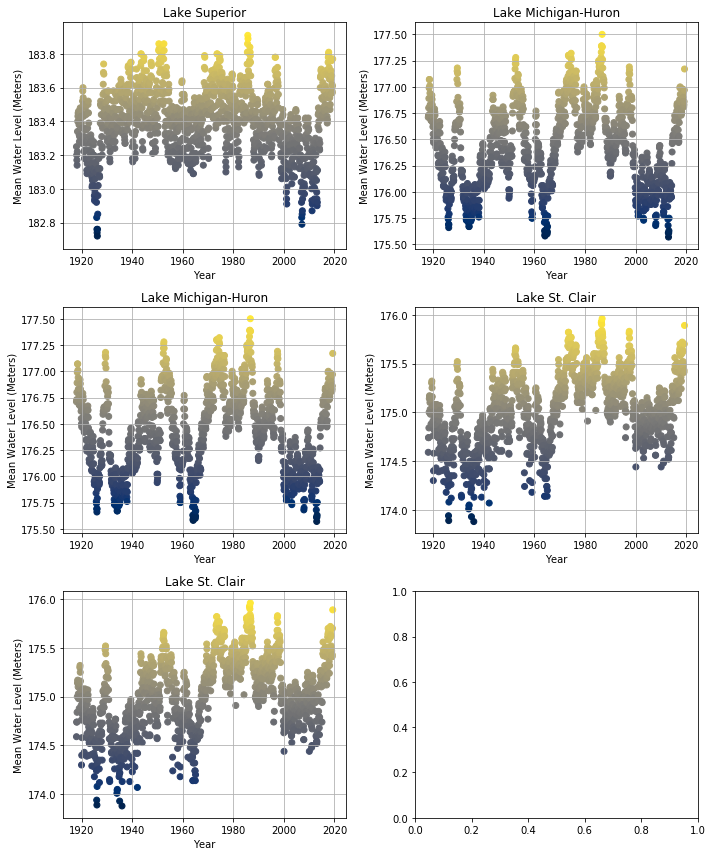

In [10]:
nrows = 3
ncols = 2
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, sharey=False)
fig.set_size_inches(10, 12)
for i in range(len(data.columns)):
    col = i % ncols
    row = i // ncols
    # Select the column at position r+c
    plot_data = data.iloc[:,row+col]
    # Select the axis to plot on
    ax = axs[row,col]
    ax.scatter(plot_data.index, plot_data.values, c=plot_data.values, cmap=plt.cm.cividis)
    ax.title.set_text(f"Lake {plot_data.name}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Mean Water Level (Meters)")
    ax.grid(True)
    
plt.tight_layout()

## Using plotly instead of matplotlib

Plotly together with cufflinks allows for easy interactive visualizations on pandas dataframes.

Just install them via `pip install plotly cufflinks`

In [11]:
# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

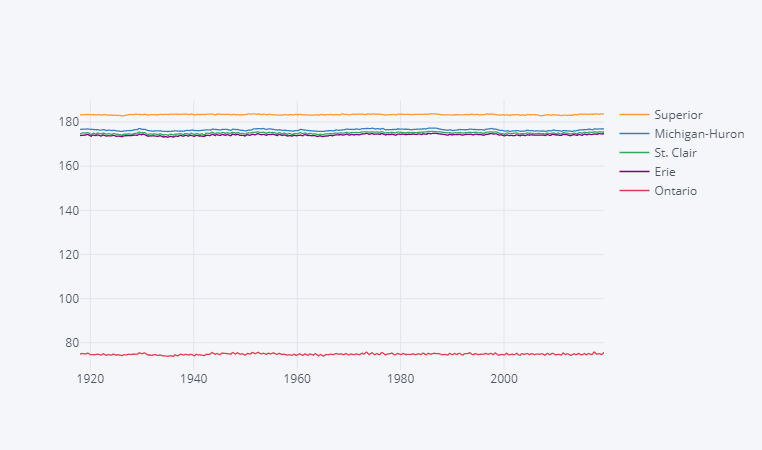

In [12]:
data.iplot()

Add a separate Y-Axis for *Ontario*, since it differs so much from the others

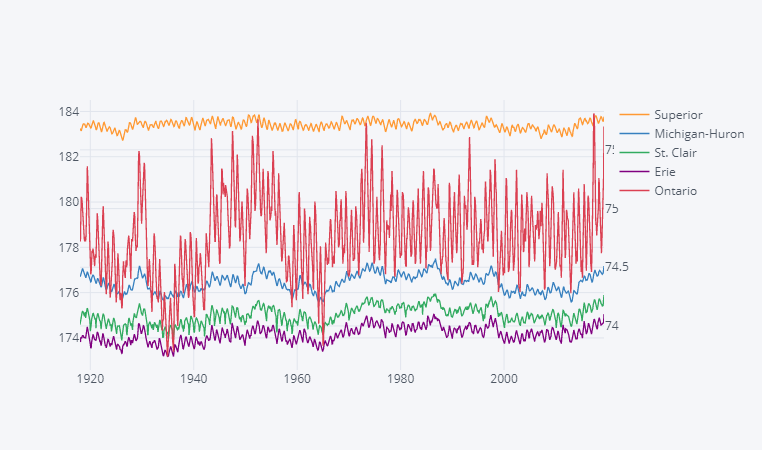

In [13]:
data.iplot(secondary_y=["Ontario"])

## That's all

Just saw your post on Reddit earlier and had some ideas about how to improve the plots, maybe it has helped you a little